In [1]:
import time
start_time=time.time()

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import interpolate
import pickle
import json

import strucfunc
from strucfunc import sosflog
from bfunc import bfunc00,bfunc01,bfunc02,bfunc03s


In [3]:
reg = 'Car'
line = 'CarR'

In [4]:
pickle_in = open('VFL//' + reg + '.pkl',"rb")
VF = pickle.load(pickle_in)
data = VF[line]

In [5]:
data.RV.var()

50.18670390511795

In [6]:
sig = data.RV.std()
sig2 = data.RV.var()

In [7]:
table = sosflog(data,0.2,3600)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
table

s                                                                  \
        count         mean         std          min          25%          50%   
ils                                                                             
0       345.0    10.872078    3.529744     0.211978     8.192622    11.392091   
1       545.0    20.976893    2.615857    15.874459    18.865308    21.296704   
2      1537.0    32.641318    4.175150    25.128815    29.145202    32.649176   
3      3657.0    52.287290    6.691565    39.813962    46.702975    52.859737   
4      8466.0    82.719950   10.583610    63.098171    73.499849    83.241474   
5     19558.0   131.181483   16.799531   100.009860   117.023766   132.101733   
6     41364.0   206.340866   26.748312   158.501435   183.344495   206.630329   
7     81798.0   325.784786   42.202673   251.191013   289.636424   326.182646   
8    115054.0   507.245006   66.579429   398.107604   449.371869   503.439984   
9     83148.0   768.873720   96.533589   630.964145   686.845457   752.946801   
10     9341.0  1118.915011  102.643384  1000.018542  1037.023511  1091.103449   
11        9.0  1644.725897   41.476523  1588.467518  1602.436084  1652.707750   

                                    dV2                                  \
             75%          max     count        mean         std     min   
ils                                                                       
0      13.615549    15.845764     345.0   28.240737  126.047206  0.0001   
1      22.955463    25.091664     545.0   37.279754  132.288852  0.0000   
2      36.165933    39.802429    1537.0   38.711501  130.908197  0.0000   
3      58.352033    63.087057    3657.0   49.551929  133.135327  0.0000   
4      91.900381    99.997282    8466.0   66.529598  160.614432  0.0000   
5     145.717643   158.486965   19558.0   78.890463  157.639332  0.0000   
6     229.780871   251.183547   41364.0   91.346956  150.279881  0.0000   
7     362.485188   398.103869   81798.0  112.856287  162.024763  0.0000   
8     563.468657   630.956505  115054.0  104.432028  147.154025  0.0000   
9     838.204338   999.996825   83148.0   99.679218  130.633412  0.0000   
10   1175.828411  1582.435391    9341.0  101.095584  119.963600  0.0000   
11   1674.020151  1693.387954       9.0   60.996867  121.342816  0.1089   

                                             
         25%       50%       75%        max  
ils                                          
0     0.4356   2.10250    8.7616  1274.4900  
1     0.5041   3.02760   14.4400  1560.2500  
2     0.9409   4.49440   17.6400  1480.7104  
3     1.7424   8.52640   33.4084  1748.0761  
4     2.2500  12.46090   46.3761  1635.3936  
5     3.3856  18.96605   74.1321  1975.8025  
6     6.0025  32.49000  106.9156  2274.3361  
7    11.9025  52.27290  141.6100  2127.9769  
8    10.1124  47.61000  131.5609  1816.4644  
9    10.1761  48.02490  139.0041  1706.5161  
10   14.2129  58.67560  144.4804  1004.8900  
11    1.9600   8.29440   53.7289   378.3025

In [9]:
s = 0.5 * (table[('s', 'min')] + table[('s', 'max')])*VF['pc']
e_s = 0.5 * (table[('s', 'max')] - table[('s', 'min')])*VF['pc']
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')] / np.sqrt(ng)

In [10]:
r0 = np.interp(sig2, b2, s)
r0

0.5429257416905536

In [11]:
r1 = np.interp(sig, b2, s,period = 360)
r1

0.3340960483482549

In [12]:
r2 = np.interp(2*sig2, b2, s, period = 360)
r2

10.828952726925017

In [13]:
#x = s
#y = b2 - sig2
#tck=interpolate.splrep(x,y,s=0)
#grid=np.linspace(x.min(),x.max(),num=len(x))
#ynew=interpolate.splev(grid,tck,der=0)
#inter=pd.DataFrame([grid,ynew]).T
#SFr=interpolate.sproot(tck)
#SFr

In [14]:
m = 0.8

In [15]:
rgrid = np.linspace(s[0], s[:-1])

(50.18670390511795, 0.5429257416905536, 0.8)

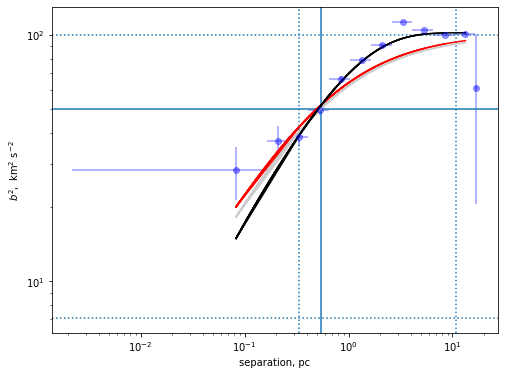

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")


ax.axhline(sig2, ls='-')
ax.axvline(r0, ls='-')

ax.axhline(2*sig2, ls=':')
ax.axvline(r2, ls=':')

ax.axhline(sig, ls=':')
ax.axvline(r1, ls=':')

ax.plot(rgrid, bfunc00(rgrid, r0, sig2, m), color="0.8")
ax.plot(rgrid, bfunc02(rgrid, r0, sig2, m, VF['s0'], b2.mean()*0.025), color="red")
ax.plot(rgrid, bfunc03s(rgrid, r0, sig2, m, VF['s0'], 2.0), color="black")

ax.set(xscale='log', yscale='log', 
       xlabel='separation, pc',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

sig2, r0, m

In [17]:
table

s                                                                  \
        count         mean         std          min          25%          50%   
ils                                                                             
0       345.0    10.872078    3.529744     0.211978     8.192622    11.392091   
1       545.0    20.976893    2.615857    15.874459    18.865308    21.296704   
2      1537.0    32.641318    4.175150    25.128815    29.145202    32.649176   
3      3657.0    52.287290    6.691565    39.813962    46.702975    52.859737   
4      8466.0    82.719950   10.583610    63.098171    73.499849    83.241474   
5     19558.0   131.181483   16.799531   100.009860   117.023766   132.101733   
6     41364.0   206.340866   26.748312   158.501435   183.344495   206.630329   
7     81798.0   325.784786   42.202673   251.191013   289.636424   326.182646   
8    115054.0   507.245006   66.579429   398.107604   449.371869   503.439984   
9     83148.0   768.873720   96.533589   630.964145   686.845457   752.946801   
10     9341.0  1118.915011  102.643384  1000.018542  1037.023511  1091.103449   
11        9.0  1644.725897   41.476523  1588.467518  1602.436084  1652.707750   

                                    dV2                                  \
             75%          max     count        mean         std     min   
ils                                                                       
0      13.615549    15.845764     345.0   28.240737  126.047206  0.0001   
1      22.955463    25.091664     545.0   37.279754  132.288852  0.0000   
2      36.165933    39.802429    1537.0   38.711501  130.908197  0.0000   
3      58.352033    63.087057    3657.0   49.551929  133.135327  0.0000   
4      91.900381    99.997282    8466.0   66.529598  160.614432  0.0000   
5     145.717643   158.486965   19558.0   78.890463  157.639332  0.0000   
6     229.780871   251.183547   41364.0   91.346956  150.279881  0.0000   
7     362.485188   398.103869   81798.0  112.856287  162.024763  0.0000   
8     563.468657   630.956505  115054.0  104.432028  147.154025  0.0000   
9     838.204338   999.996825   83148.0   99.679218  130.633412  0.0000   
10   1175.828411  1582.435391    9341.0  101.095584  119.963600  0.0000   
11   1674.020151  1693.387954       9.0   60.996867  121.342816  0.1089   

                                             
         25%       50%       75%        max  
ils                                          
0     0.4356   2.10250    8.7616  1274.4900  
1     0.5041   3.02760   14.4400  1560.2500  
2     0.9409   4.49440   17.6400  1480.7104  
3     1.7424   8.52640   33.4084  1748.0761  
4     2.2500  12.46090   46.3761  1635.3936  
5     3.3856  18.96605   74.1321  1975.8025  
6     6.0025  32.49000  106.9156  2274.3361  
7    11.9025  52.27290  141.6100  2127.9769  
8    10.1124  47.61000  131.5609  1816.4644  
9    10.1761  48.02490  139.0041  1706.5161  
10   14.2129  58.67560  144.4804  1004.8900  
11    1.9600   8.29440   53.7289   378.3025

In [18]:
Car = { 'VF' : data,
        'SF' : table,
        's' : s,
        'b2' : b2,
        'sig2' : sig2,
        'pc' : VF['pc'],
        'r0' : r0,
        'r1' : r1,
        'r2' : r2,
        's0' : VF['s0'],
        'm' : m}

In [19]:
f = open('SFresults\\'+ line + '.pkl',"wb")
pickle.dump(Car,f)
f.close()

class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

jsonfilename = f'SFresults//' + line +'.json'
with open(jsonfilename, "w") as f:
    json.dump(Car, fp=f, indent=3, cls=MyEncoder)
print(jsonfilename, end="")

In [20]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 6.736144542694092 seconds ---
